# Segmentation

Sample segmentation using MMSegmentation library

In [2]:
import os

import pandas as pd

import mmcv
import mmseg
from mmseg.apis import inference_segmentor, init_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette

/home/andrealombardo/miniconda3/envs/sidewalk/lib/python3.10/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


#### Define paths

The notebook assumes there are sample images available to segment (if that's not the case, run preprocess.ipynb first)

In [21]:
# Config and checkpoint file paths
config_file = '../lib/mmsegmentation/configs/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes.py'
checkpoint_file = '../lib/mmsegmentation/checkpoints/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth'

# Sample image path (this assumes you already ran preprocess.ipynb and have at least one image available)
folder = '../res/dataset/reprojected'
pano_id = os.listdir(folder)[2]
print(pano_id)

TMX7316010203-002649_pano_0004_000570


In [22]:
img_path = os.path.join(folder, pano_id)
print(img_path)
# build the model from a config file and a checkpoint file
model = init_segmentor(config_file, checkpoint_file, device='cuda:0')

# test a single image and show the results
path = os.path.join(img_path, 'right.png')
img = mmcv.imread(path)

../res/dataset/reprojected/TMX7316010203-002649_pano_0004_000570
load checkpoint from local path: ../lib/mmsegmentation/checkpoints/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth


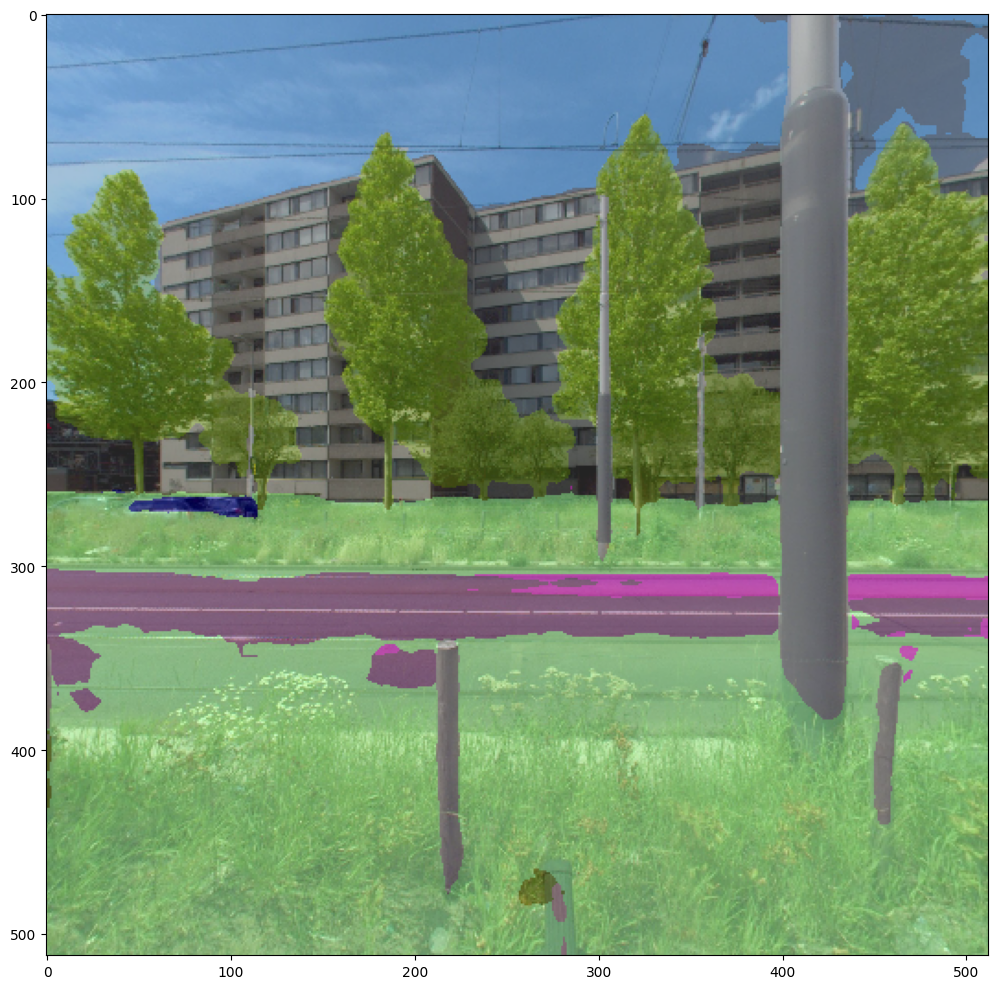

In [23]:
result = inference_segmentor(model, img)
# show the results
show_result_pyplot(model, img, result, get_palette('cityscapes'))

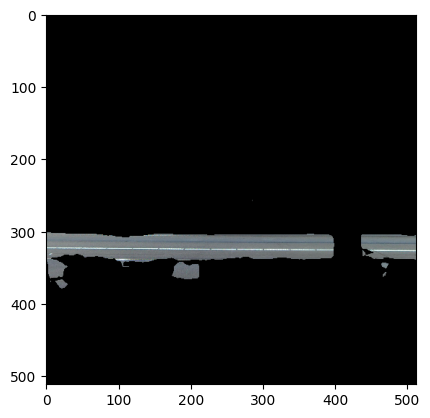

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Load the image from img
image = mmcv.imread(path)
# Experiment with classes.
# From: https://github.com/open-mmlab/mmsegmentation/blob/master/mmseg/datasets/cityscapes.py 
# ('road', 'sidewalk', 'building', 'wall', 'fence', 'pole',
# 'traffic light', 'traffic sign', 'vegetation', 'terrain', 'sky',
# 'person', 'rider', 'car', 'truck', 'bus', 'train', 'motorcycle',
# 'bicycle')
# Black out all classes except for 'road' (0) and 'sidewalk' (1) simultaneously
image[np.where((result[0] != 0) & (result[0] != 1))] = 0

# Show the image
plt.imshow(image)